### Область работы 1 (библиотеки)

In [1]:
from matplotlib.colors import ListedColormap
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import OneHotEncoder

import sklearn
# !pip install scipy
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression  # logistic regression

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


sns.set()

### Область работы 2 (поиск лучшей модели)

In [2]:
path_train = pd.read_csv('train.csv')

In [3]:
path_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
1,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
4,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
223,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
224,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
225,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [4]:
path_train[path_train.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [5]:
path_train.oldpeak.unique()

array([1.6, 2.8, 2. , 2.3, 0. , 4.2, 1.4, 0.2, 1. , 0.4, 0.5, 0.9, 3. ,
       0.6, 4. , 2.6, 0.1, 6.2, 5.6, 1.8, 0.8, 1.2, 3.4, 3.2, 2.2, 2.5,
       0.3, 1.5, 3.6, 2.4, 3.1, 1.1, 1.9, 3.5])

In [6]:
path_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.00000,227.000000,227.000000,227.000000
mean,54.251101,0.696035,0.995595,132.118943,247.202643,0.136564,0.515419,149.392070,0.317181,1.004846,1.39207,0.713656,2.312775,0.541850
std,8.827423,0.460984,1.041178,17.492323,51.799079,0.344145,0.526703,22.432604,0.466407,1.154684,0.61004,1.027041,0.633829,0.499347
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.00000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.00000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,4.000000,3.000000,1.000000


In [7]:
path_train.shape

(227, 14)

In [8]:
path_train = path_train.dropna()
path_train.shape


(227, 14)

In [9]:
path_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [11]:
maybe_anomalies_check = ['age','trestbps', 'chol', 'thalach', 'oldpeak']

#trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

#chol: The person's cholesterol measurement in mg/dl

#thalach: The person's maximum heart rate achieved

#oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot

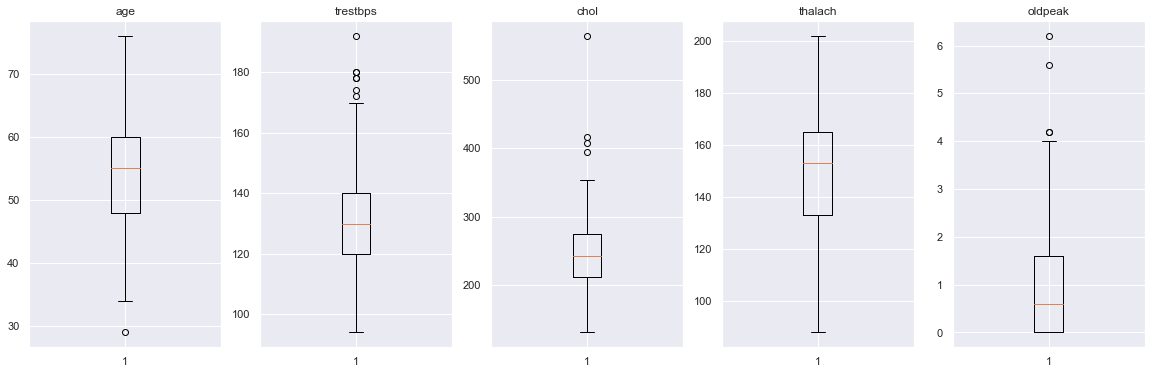

In [12]:
maybe_anomalies_check = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.boxplot(path_train["age"])
ax1.set_title("age")

ax2.boxplot(path_train["trestbps"])
ax2.set_title("trestbps")

ax3.boxplot(path_train["chol"])
ax3.set_title("chol")

ax4.boxplot(path_train["thalach"])
ax4.set_title("thalach")

ax5.boxplot(path_train["oldpeak"])
ax5.set_title("oldpeak")

plt.show()

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
TOP_FEATURES = 13

forest = ExtraTreesClassifier(n_estimators=100, max_depth=5)
forest.fit(path_train[labels], path_train['target'])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 2 (0.189927)
2. feature 11 (0.150617)
3. feature 8 (0.146645)
4. feature 12 (0.114990)
5. feature 10 (0.074197)
6. feature 1 (0.072777)
7. feature 9 (0.072283)
8. feature 7 (0.065553)
9. feature 0 (0.030091)
10. feature 6 (0.029669)
11. feature 3 (0.026097)
12. feature 4 (0.014547)
13. feature 5 (0.012606)


In [14]:
unimportant_features = ['chol', 'fbs', 'restecg']


In [15]:
path_train = path_train.drop(unimportant_features, axis=1)

In [16]:
# sns.pairplot(path_train[maybe_anomalies_check], diag_kind="kde")

In [17]:
z_scores_trtbps = zscore(path_train["trestbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 40
-------------------
Threshold Value: 2
Number of Outliers: 11
-------------------
Threshold Value: 3
Number of Outliers: 1
-------------------


In [18]:
path_train[z_scores_trtbps > 2][["trestbps"]]

,trestbps
1,170
46,170
49,170
75,170
81,180
140,192
141,178
172,178
183,180
201,174


In [19]:
print(path_train[z_scores_trtbps > 2].trestbps.min())
print(path_train[path_train["trestbps"] < 170].trestbps.max())

170
164


In [20]:
winsorize_percentile_trestbps = (stats.percentileofscore(path_train["trestbps"], 164)) / 100
print(winsorize_percentile_trestbps)

trestbps_winsorize = winsorize(path_train.trestbps, (0, (1 - winsorize_percentile_trestbps)))

0.9515418502202643


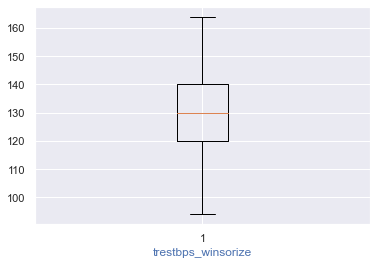

In [21]:
plt.boxplot(trestbps_winsorize)
plt.xlabel("trestbps_winsorize", color = "b")
plt.show()

In [22]:
path_train["trestbps_winsorize"] = trestbps_winsorize

In [23]:
(path_train["trestbps"] - path_train["trestbps_winsorize"]).sum()

130

In [24]:
path_train.drop(["trestbps"], axis = 1, inplace = True)

In [25]:
path_train["trestbps_winsorize"].count()

227

In [26]:
path_train

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_winsorize
0,71,0,0,125,0,1.6,1,0,2,1,112
1,58,0,0,146,1,2.8,1,2,1,0,164
2,55,0,0,130,1,2.0,1,1,3,0,128
3,63,1,3,150,0,2.3,0,0,1,1,145
4,59,1,0,162,1,0.0,2,1,3,0,140
...,...,...,...,...,...,...,...,...,...,...,...
222,54,1,0,116,1,3.2,1,2,2,0,122
223,60,1,0,142,1,2.8,1,2,3,0,145
224,67,1,0,108,1,1.5,1,3,2,0,160
225,44,1,1,173,0,0.0,2,0,3,1,120


In [27]:
def iqr(path_train, var):
    q1 = np.quantile(path_train[var], 0.25)
    q3 = np.quantile(path_train[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return path_train[(path_train[var] < lower_v) | (path_train[var] > upper_v)]

In [28]:
thalach_out = iqr(path_train, "oldpeak")
thalach_out

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_winsorize
6,51,1,0,122,1,4.2,1,3,3,0,140
39,62,0,0,145,0,6.2,0,3,3,0,160
41,55,1,0,111,1,5.6,0,0,3,0,140
172,59,1,3,145,0,4.2,0,0,3,1,164


In [29]:
path_train[path_train["oldpeak"] < 4.2].oldpeak.max()

4.0

In [30]:
winsorize_percentile_oldpeak = (stats.percentileofscore(path_train["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801762114537445


In [31]:
oldpeak_winsorize = winsorize(path_train.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

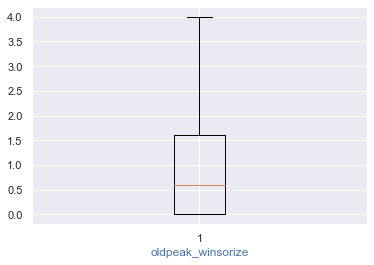

In [32]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [33]:
path_train["oldpeak_winsorize"] = oldpeak_winsorize

In [34]:
# chol_out = iqr(path_train, "chol")
# chol_out

In [35]:
# path_train[path_train["chol"] < 394].chol.max()

In [36]:
# winsorize_percentile_chol = (stats.percentileofscore(path_train["chol"], 353)) / 100
# print(winsorize_percentile_chol)

In [37]:
# chol_winsorize = winsorize(path_train.chol, (0, (1 - winsorize_percentile_chol)))

In [38]:
# plt.boxplot(chol_winsorize)
# plt.xlabel("chol_winsorize", color = "b")
# plt.show()

In [39]:
# path_train["chol_winsorize"] = chol_winsorize


In [40]:
path_train.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_winsorize,oldpeak_winsorize
0,71,0,0,125,0,1.6,1,0,2,1,112,1.6
1,58,0,0,146,1,2.8,1,2,1,0,164,2.8
2,55,0,0,130,1,2.0,1,1,3,0,128,2.0
3,63,1,3,150,0,2.3,0,0,1,1,145,2.3
4,59,1,0,162,1,0.0,2,1,3,0,140,0.0


In [41]:
# path_train.drop(["trestbps", "oldpeak", "chol"], axis = 1, inplace = True)
# path_train.drop(["oldpeak"], axis = 1, inplace = True)

In [42]:
path_train.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target,trestbps_winsorize,oldpeak_winsorize
0,71,0,0,125,0,1.6,1,0,2,1,112,1.6
1,58,0,0,146,1,2.8,1,2,1,0,164,2.8
2,55,0,0,130,1,2.0,1,1,3,0,128,2.0
3,63,1,3,150,0,2.3,0,0,1,1,145,2.3
4,59,1,0,162,1,0.0,2,1,3,0,140,0.0


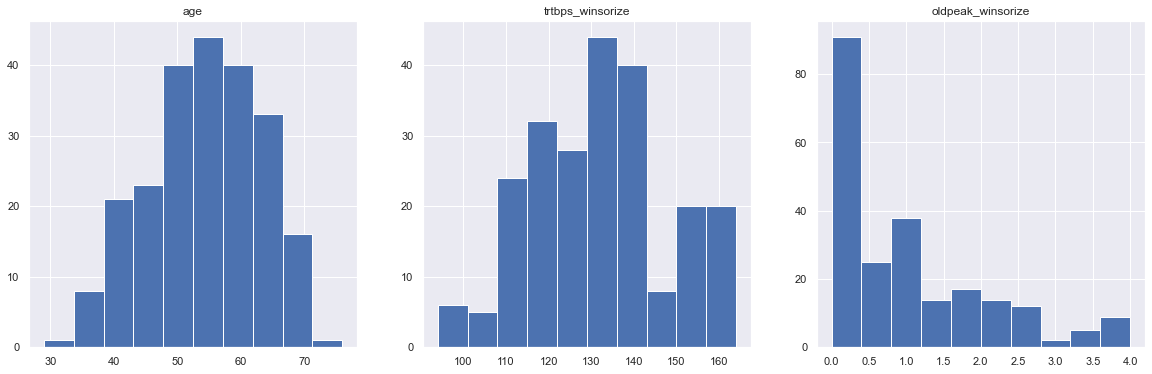

In [43]:
fig, (ax1, ax2, ax4) = plt.subplots(1, 3, figsize = (20, 6))
# fig, (ax4) = plt.subplots(1, 1, figsize = (6, 6))
ax1.hist(path_train["age"])
ax1.set_title("age")

ax2.hist(path_train["trestbps_winsorize"])
ax2.set_title("trtbps_winsorize")

# ax3.hist(path_train["chol_winsorize"])
# ax3.set_title("chol_winsorize")

ax4.hist(path_train["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [44]:
path_train["oldpeak_winsorize_sqrt"] = np.sqrt(path_train["oldpeak_winsorize"])
path_train = path_train.drop(['oldpeak'], axis = 1)

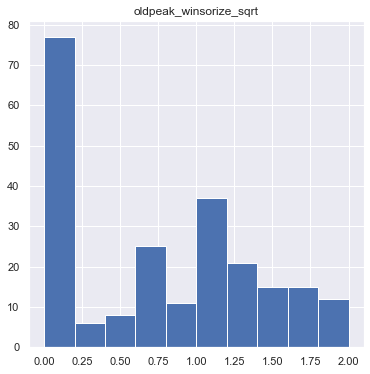

In [45]:
fig, (ax4) = plt.subplots(1, 1, figsize = (6, 6))

ax4.hist(path_train["oldpeak_winsorize_sqrt"])
ax4.set_title("oldpeak_winsorize_sqrt")

plt.show()

In [46]:
path_train.drop(["oldpeak_winsorize"], axis = 1, inplace = True)

In [47]:
path_train.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trestbps_winsorize,oldpeak_winsorize_sqrt
0,71,0,0,125,0,1,0,2,1,112,1.264911
1,58,0,0,146,1,1,2,1,0,164,1.673320
2,55,0,0,130,1,1,1,3,0,128,1.414214
3,63,1,3,150,0,0,0,1,1,145,1.516575
4,59,1,0,162,1,2,1,3,0,140,0.000000


In [48]:
path_train.thal.unique()

array([2, 1, 3, 0])

In [49]:
path_train.thal = path_train.thal.replace(0, 1)

In [50]:
path_train.thal.unique()

array([2, 1, 3])

In [51]:
# columns_to_encode = ['cp', 'slope', 'restecg', 'ca', 'thal']
columns_to_encode = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']

In [52]:
path_train = pd.get_dummies(path_train, columns = columns_to_encode, drop_first = True)

In [53]:
path_train.iloc[:5, 5:]

,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,0,0,1


In [54]:
path_train.head()

,age,thalach,target,trestbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,71,125,1,112,1.264911,0,0,0,0,0,1,0,0,0,0,0,1,0
1,58,146,0,164,1.673320,0,0,0,0,1,1,0,0,1,0,0,0,0
2,55,130,0,128,1.414214,0,0,0,0,1,1,0,1,0,0,0,0,1
3,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
4,59,162,0,140,0.000000,1,0,0,0,1,0,1,1,0,0,0,0,1


In [55]:
# num_cols = ["age", "thalach", "chol_winsorize", "trestbps_winsorize", "oldpeak_winsorize_sqrt"]
num_cols = ['age','trestbps_winsorize', "thalach", "oldpeak_winsorize_sqrt"]

In [56]:
rs = RobustScaler()
path_train[num_cols] = rs.fit_transform(path_train[num_cols])

In [57]:
path_train.head()

,age,thalach,target,trestbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,1.333333,-0.87500,1,-0.90,0.387628,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0.250000,-0.21875,0,1.70,0.710503,0,0,0,0,1,1,0,0,1,0,0,0,0
2,0.000000,-0.71875,0,-0.10,0.505662,0,0,0,0,1,1,0,1,0,0,0,0,1
3,0.666667,-0.09375,1,0.75,0.586585,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0.333333,0.28125,0,0.50,-0.612372,1,0,0,0,1,0,1,1,0,0,0,0,1


In [58]:
X = path_train.drop(["target"], axis = 1)
y = path_train[["target"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(181, 17)
(46, 17)


In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = log_reg.score(X_test, y_test)
print('The accuracy of the LogisticRegression Model is', score_randomforest)

The accuracy of the LogisticRegression Model is 0.8695652173913043


In [60]:
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8100000000000002


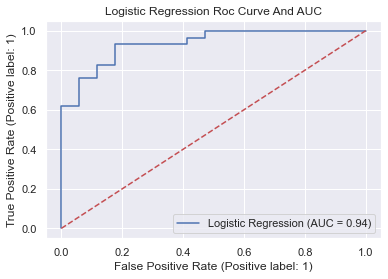

In [61]:
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [62]:
grid={"C":np.logspace(-3,3,7), 
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
      "penalty":["l1","l2","elasticnet"]}

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, grid, scoring='f1', cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f1:",logreg_cv.best_score_)
print(logreg_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
f1: 0.8293567251461988
LogisticRegression(penalty='l1', solver='liblinear')


In [63]:
gridresults = pd.DataFrame(logreg_cv.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,47,52,65,68,69,66,67,64,99,79,...,48,46,45,44,43,42,41,40,63,104
mean_fit_time,0.002799,0.002517,0.008119,0.004681,0.006092,0.00869,0.002845,0.006175,0.005491,0.006161,...,0.000574,0.000598,0.000559,0.000545,0.000622,0.000534,0.000651,0.000634,0.000521,0.000516
std_fit_time,0.00021,0.000258,0.000454,0.000458,0.000351,0.00078,0.000478,0.000038,0.000052,0.000032,...,0.000047,0.000082,0.000051,0.00004,0.000142,0.000036,0.000183,0.000103,0.000011,0.000005
mean_score_time,0.002224,0.002149,0.00215,0.002482,0.002243,0.002402,0.00222,0.001814,0.001816,0.001803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.000348,0.000252,0.000637,0.000391,0.000293,0.000167,0.000283,0.00002,0.000021,0.000011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_C,1.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,1000.0,100.0,...,1.0,1.0,1.0,0.1,0.1,0.1,0.1,0.1,10.0,1000.0
param_penalty,l1,l2,l2,l2,l2,l2,l2,l1,l2,l1,...,l1,l1,l1,elasticnet,elasticnet,elasticnet,elasticnet,elasticnet,l1,elasticnet
param_solver,liblinear,liblinear,newton-cg,sag,saga,lbfgs,liblinear,saga,saga,saga,...,sag,lbfgs,newton-cg,saga,sag,liblinear,lbfgs,newton-cg,sag,saga
params,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...","{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...","{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...","{'C': 10.0, 'penalty': 'l2', 'solver': 'sag'}","{'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}","{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}","{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin...","{'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}","{'C': 1000.0, 'penalty': 'l2', 'solver': 'saga'}","{'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}",...,"{'C': 1.0, 'penalty': 'l1', 'solver': 'sag'}","{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}","{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...","{'C': 0.1, 'penalty': 'elasticnet', 'solver': ...","{'C': 0.1, 'penalty': 'elasticnet', 'solver': ...","{'C': 0.1, 'penalty': 'elasticnet', 'solver': ...","{'C': 0.1, 'penalty': 'elasticnet', 'solver': ...","{'C': 0.1, 'penalty': 'elasticnet', 'solver': ...","{'C': 10.0, 'penalty': 'l1', 'solver': 'sag'}","{'C': 1000.0, 'penalty': 'elasticnet', 'solver..."
split0_test_score,0.833333,0.833333,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
split1_test_score,0.888889,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,0.947368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Правильность на обучающем наборе: 0.856
Правильность на тестовом наборе: 0.891


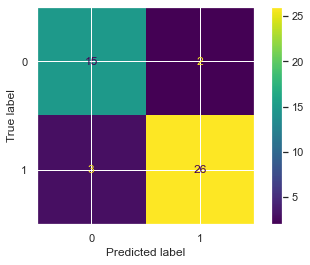

In [64]:
rf_best = LogisticRegression(penalty='l1', solver='saga')
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print('Правильность на обучающем наборе: {:.3f}'.format(
    rf_best.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    rf_best.score(X_test, y_test)))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.93      0.90      0.91        29

    accuracy                           0.89        46
   macro avg       0.88      0.89      0.88        46
weighted avg       0.89      0.89      0.89        46



In [66]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test, y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)


The accuracy of the Random Forest Model is 0.8043478260869565


In [67]:
scores = cross_val_score(randomforest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.78


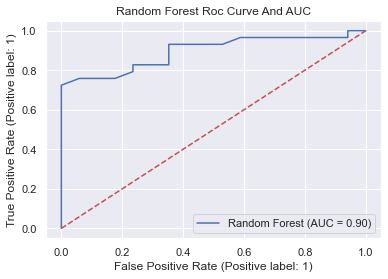

In [68]:
plot_roc_curve(randomforest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [69]:
random_forest_new = RandomForestClassifier()
random_forest_new

parameters = {"n_estimators" : [50, 100, 150, 200], 
              "criterion" : ["gini", "entropy"], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False],
             'max_depth':[2, 4, 6, 8]}

random_forest_grid = GridSearchCV(random_forest_new, param_grid = parameters, cv=10, scoring = 'f1')

random_forest_grid.fit(X_train, y_train)


print("Best Parameters:", random_forest_grid.best_params_)
print(random_forest_grid.best_estimator_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2')


In [70]:
gridresults = pd.DataFrame(random_forest_grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,93,95,188,83,169,59,69,158,175,122,...,145,86,128,150,68,19,102,96,106,38
mean_fit_time,0.10933,0.212582,0.043939,0.209019,0.082086,0.194697,0.102827,0.113992,0.161003,0.117367,...,0.071697,0.159466,0.041154,0.105988,0.052907,0.202695,0.106151,0.037547,0.107259,0.156658
std_fit_time,0.00155,0.000734,0.00014,0.000869,0.000474,0.000943,0.000795,0.000466,0.001261,0.00029,...,0.000384,0.00122,0.000346,0.00079,0.000725,0.00232,0.000475,0.000441,0.001824,0.000408
mean_score_time,0.009205,0.016041,0.005365,0.015264,0.008718,0.015251,0.012963,0.011707,0.015116,0.011683,...,0.008497,0.011932,0.005294,0.011543,0.00536,0.015671,0.011826,0.005522,0.012053,0.012276
std_score_time,0.000548,0.000264,0.000021,0.000403,0.000281,0.000391,0.013087,0.000201,0.000348,0.000168,...,0.000141,0.000297,0.000038,0.000108,0.000092,0.000247,0.000128,0.000217,0.000359,0.000224
param_bootstrap,True,True,False,True,False,True,True,False,False,False,...,False,True,False,False,True,True,False,False,False,True
param_criterion,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,gini,...,entropy,entropy,gini,entropy,entropy,gini,gini,gini,gini,gini
param_max_depth,8,8,8,6,6,2,4,4,6,6,...,2,8,6,2,4,4,2,2,2,8
param_max_features,log2,log2,log2,log2,auto,log2,log2,auto,sqrt,auto,...,auto,auto,log2,sqrt,log2,sqrt,sqrt,auto,log2,auto
param_n_estimators,100,200,50,200,100,200,100,150,200,150,...,100,150,50,150,50,200,150,50,150,150
params,"{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': False, 'criterion': 'gini', 'max...",...,"{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': False, 'criterion': 'gini', 'max...","{'bootstrap': False, 'criterion': 'entropy', '...","{'bootstrap': True, 'criterion': 'entropy', 'm...","{'bootstrap': True, 'criterion': 'gini', 'max_...","{'bootstrap': False, 'criterion': 'gini', 'max...","{'bootstrap': False, 'criterion': 'gini', 'max...","{'bootstrap': False, 'criterion': 'gini', 'max...","{'bootstrap': True, 'criterion': 'gini', 'max_..."


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.783


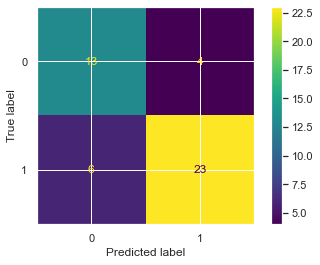

In [71]:
random_forest_new = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 200)
random_forest_new.fit(X_train, y_train)
y_pred = random_forest_new.predict(X_test)
print('Правильность на обучающем наборе: {:.3f}'.format(
    random_forest_new.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    random_forest_new.score(X_test, y_test)))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.85      0.79      0.82        29

    accuracy                           0.78        46
   macro avg       0.77      0.78      0.77        46
weighted avg       0.79      0.78      0.78        46



In [73]:
scores = cross_val_score(random_forest_new, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.76


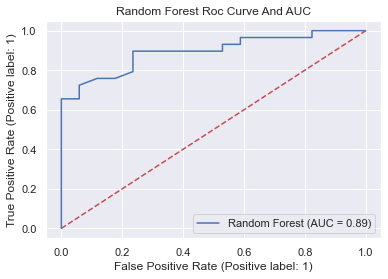

In [74]:
plot_roc_curve(random_forest_new, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [75]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[2],
    "max_features":["log2","sqrt"],
    "n_estimators":[50, 100, 150, 200]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=2)

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

Fitting 10 folds for each of 56 candidates, totalling 560 fits
-0.17391304347826086


In [76]:
print(clf.best_params_)
print(clf.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 50}
GradientBoostingClassifier(learning_rate=0.2, max_depth=2, max_features='log2',
                           n_estimators=50)


In [77]:
gridresults = pd.DataFrame(clf.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,48,26,23,45,39,43,20,38,22,21,...,19,33,4,2,8,51,42,28,52,47
mean_fit_time,0.037393,0.09612,0.138131,0.070838,0.133189,0.134616,0.036229,0.095213,0.099061,0.069154,...,0.129771,0.067663,0.038931,0.106804,0.037276,0.128378,0.100826,0.038932,0.041106,0.1316
std_fit_time,0.002237,0.003145,0.009268,0.00424,0.005146,0.004793,0.002224,0.00646,0.005188,0.004351,...,0.004916,0.004469,0.002579,0.004391,0.002319,0.003348,0.006231,0.002667,0.006449,0.006742
mean_score_time,0.005302,0.005316,0.00627,0.004994,0.005714,0.004916,0.005057,0.00492,0.005946,0.004702,...,0.005552,0.005047,0.005189,0.005503,0.005523,0.006064,0.005502,0.005395,0.005605,0.00626
std_score_time,0.000945,0.00132,0.002006,0.000807,0.00126,0.000624,0.000462,0.000616,0.001861,0.000437,...,0.001019,0.000309,0.001,0.000727,0.000765,0.001339,0.001504,0.001605,0.001502,0.00187
param_learning_rate,0.2,0.075,0.05,0.15,0.1,0.15,0.05,0.1,0.05,0.05,...,0.05,0.1,0.01,0.01,0.025,0.2,0.15,0.075,0.2,0.15
param_max_depth,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
param_max_features,log2,log2,sqrt,sqrt,sqrt,log2,sqrt,sqrt,sqrt,sqrt,...,log2,log2,sqrt,log2,log2,log2,log2,sqrt,sqrt,sqrt
param_n_estimators,50,150,200,100,200,200,50,150,150,100,...,200,100,50,150,50,200,150,50,50,200
params,"{'learning_rate': 0.2, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.075, 'max_depth': 2, 'max_...","{'learning_rate': 0.05, 'max_depth': 2, 'max_f...","{'learning_rate': 0.15, 'max_depth': 2, 'max_f...","{'learning_rate': 0.1, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.15, 'max_depth': 2, 'max_f...","{'learning_rate': 0.05, 'max_depth': 2, 'max_f...","{'learning_rate': 0.1, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.05, 'max_depth': 2, 'max_f...","{'learning_rate': 0.05, 'max_depth': 2, 'max_f...",...,"{'learning_rate': 0.05, 'max_depth': 2, 'max_f...","{'learning_rate': 0.1, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f...","{'learning_rate': 0.01, 'max_depth': 2, 'max_f...","{'learning_rate': 0.025, 'max_depth': 2, 'max_...","{'learning_rate': 0.2, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.15, 'max_depth': 2, 'max_f...","{'learning_rate': 0.075, 'max_depth': 2, 'max_...","{'learning_rate': 0.2, 'max_depth': 2, 'max_fe...","{'learning_rate': 0.15, 'max_depth': 2, 'max_f..."
split0_test_score,-0.157895,-0.157895,-0.157895,-0.157895,-0.157895,-0.157895,-0.210526,-0.157895,-0.157895,-0.210526,...,-0.157895,-0.157895,-0.263158,-0.263158,-0.210526,-0.157895,-0.157895,-0.210526,-0.157895,-0.157895


Правильность на обучающем наборе: 0.961
Правильность на тестовом наборе: 0.783


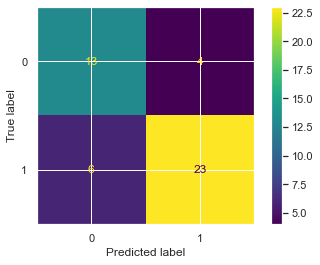

In [78]:
gbrt_best = GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=200)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt_best.predict(X_test)
print('Правильность на обучающем наборе: {:.3f}'.format(
    gbrt_best.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(
    gbrt_best.score(X_test, y_test)))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

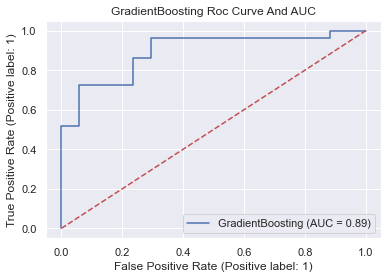

In [79]:
plot_roc_curve(gbrt_best, X_test, y_test, name = "GradientBoosting")
plt.title("GradientBoosting Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.85      0.79      0.82        29

    accuracy                           0.78        46
   macro avg       0.77      0.78      0.77        46
weighted avg       0.79      0.78      0.78        46



### Область работы 3 (выполнение лучшей модели)

In [81]:
# Данный блок(и) в области 3 выполняется преподавателем
# 
# Запрещается вносить изменения в наименования в переменных и путей к файлам определенные преподавателем
# 
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [82]:
# Путь(название) к файлу(ам) (запрещено изменять)
path_train = pd.read_csv('train.csv')
path_test  = pd.read_csv('test.csv')

# чтение файлов (разрещается использовать только указанные ранее пути)


In [83]:
# Блок(и) обучения и поверки модели

In [84]:
print(path_train.thal.unique(), path_test.thal.unique())

[2 1 3 0] [2 3 1]


In [85]:
from sklearn.ensemble import ExtraTreesClassifier
TOP_FEATURES = 13

forest = ExtraTreesClassifier(n_estimators=100,  max_depth=5)
forest.fit(path_train.drop(['target'], axis =1), path_train['target'])

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 8 (0.164853)
2. feature 12 (0.158900)
3. feature 2 (0.152395)
4. feature 11 (0.132295)
5. feature 10 (0.088844)
6. feature 7 (0.065124)
7. feature 9 (0.064409)
8. feature 1 (0.061066)
9. feature 6 (0.031024)
10. feature 0 (0.029314)
11. feature 3 (0.025555)
12. feature 4 (0.015585)
13. feature 5 (0.010636)


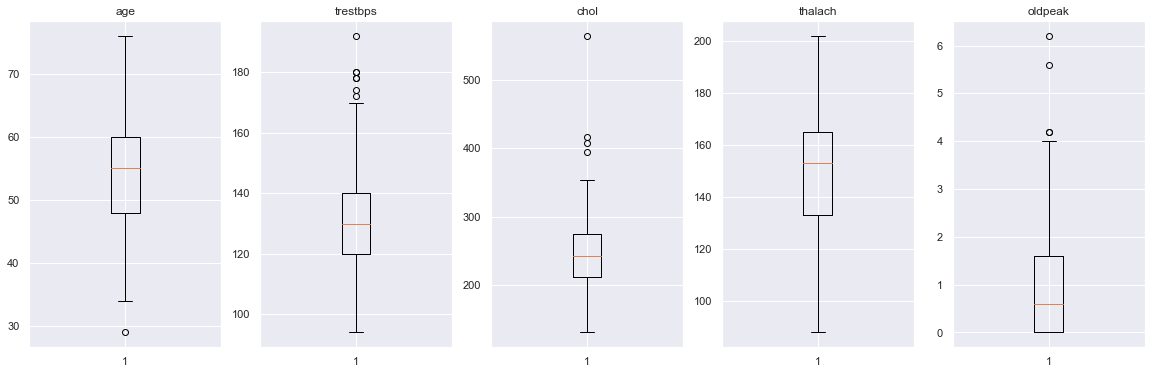

In [86]:
maybe_anomalies_check = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.boxplot(path_train["age"])
ax1.set_title("age")

ax2.boxplot(path_train["trestbps"])
ax2.set_title("trestbps")

ax3.boxplot(path_train["chol"])
ax3.set_title("chol")

ax4.boxplot(path_train["thalach"])
ax4.set_title("thalach")

ax5.boxplot(path_train["oldpeak"])
ax5.set_title("oldpeak")

plt.show()

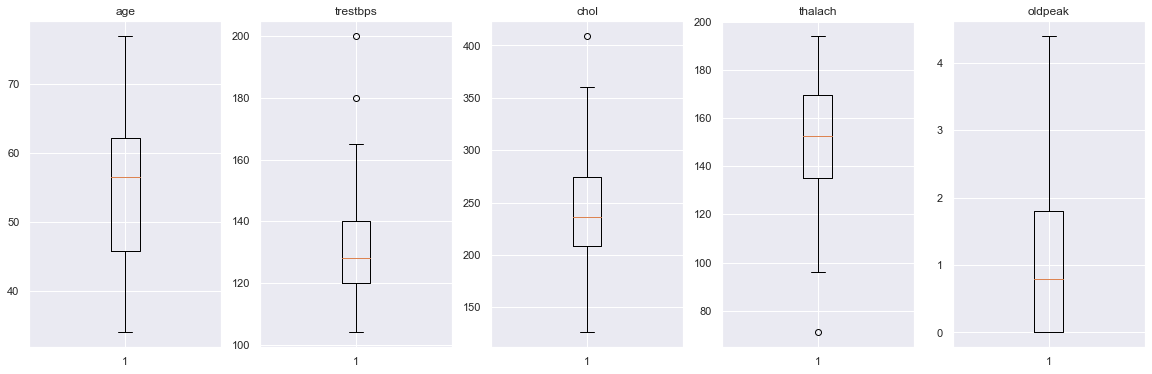

In [87]:
maybe_anomalies_check = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20, 6))

ax1.boxplot(path_test["age"])
ax1.set_title("age")

ax2.boxplot(path_test["trestbps"])
ax2.set_title("trestbps")

ax3.boxplot(path_test["chol"])
ax3.set_title("chol")

ax4.boxplot(path_test["thalach"])
ax4.set_title("thalach")

ax5.boxplot(path_test["oldpeak"])
ax5.set_title("oldpeak")

plt.show()

In [88]:
unimportant_features = ['chol', 'fbs', 'restecg']
path_test = path_test.drop(unimportant_features, axis=1)
path_train = path_train.drop(unimportant_features, axis=1)

In [89]:
z_scores_trtbps = zscore(path_train["trestbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 40
-------------------
Threshold Value: 2
Number of Outliers: 11
-------------------
Threshold Value: 3
Number of Outliers: 1
-------------------


In [90]:
path_train[z_scores_trtbps > 2][["trestbps"]]

,trestbps
1,170
46,170
49,170
75,170
81,180
140,192
141,178
172,178
183,180
201,174


In [91]:
print(path_train[z_scores_trtbps > 2].trestbps.min())
print(path_train[path_train["trestbps"] < 170].trestbps.max())

170
164


In [92]:
winsorize_percentile_trestbps = (stats.percentileofscore(path_train["trestbps"], 164)) / 100
print(winsorize_percentile_trestbps)

trestbps_winsorize = winsorize(path_train.trestbps, (0, (1 - winsorize_percentile_trestbps)))

0.9515418502202643


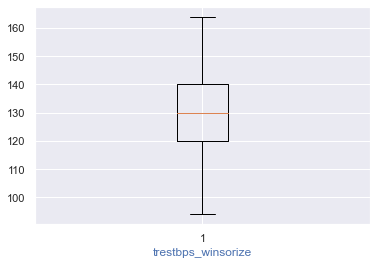

In [93]:
plt.boxplot(trestbps_winsorize)
plt.xlabel("trestbps_winsorize", color = "b")
plt.show()

In [94]:
path_train["trestbps"] = trestbps_winsorize

In [95]:
path_train["trestbps"].count()

227

In [96]:
path_train.head()

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,125,0,1.6,1,0,2,1
1,58,0,0,164,146,1,2.8,1,2,1,0
2,55,0,0,128,130,1,2.0,1,1,3,0
3,63,1,3,145,150,0,2.3,0,0,1,1
4,59,1,0,140,162,1,0.0,2,1,3,0


In [97]:
z_scores_trtbps_test = zscore(path_test["trestbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps_test > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 13
-------------------
Threshold Value: 2
Number of Outliers: 2
-------------------
Threshold Value: 3
Number of Outliers: 1
-------------------


In [98]:
path_test[z_scores_trtbps_test > 2][["trestbps"]]

,trestbps
13,200
72,180


In [99]:
print(path_test[z_scores_trtbps_test > 2].trestbps.min())
print(path_test[path_test["trestbps"] < 170].trestbps.max())

180
165


In [100]:
winsorize_percentile_trestbps = (stats.percentileofscore(path_test["trestbps"], 165)) / 100
print(winsorize_percentile_trestbps)

trestbps_winsorize = winsorize(path_test.trestbps, (0, (1 - winsorize_percentile_trestbps)))

0.9736842105263157


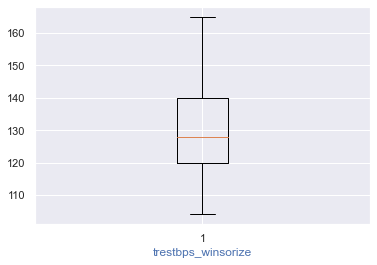

In [101]:
plt.boxplot(trestbps_winsorize)
plt.xlabel("trestbps_winsorize", color = "b")
plt.show()

In [102]:
path_test["trestbps"] = trestbps_winsorize

In [103]:
path_test["trestbps"].count()

76

In [104]:
def iqr(path_train, var):
    q1 = np.quantile(path_train[var], 0.25)
    q3 = np.quantile(path_train[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return path_train[(path_train[var] < lower_v) | (path_train[var] > upper_v)]

In [105]:
oldpeak_out = iqr(path_train, "oldpeak")
oldpeak_out

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
6,51,1,0,140,122,1,4.2,1,3,3,0
39,62,0,0,160,145,0,6.2,0,3,3,0
41,55,1,0,140,111,1,5.6,0,0,3,0
172,59,1,3,164,145,0,4.2,0,0,3,1


In [106]:
path_train[path_train["oldpeak"] < 4.2].oldpeak.max()

4.0

In [107]:
winsorize_percentile_oldpeak = (stats.percentileofscore(path_train["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801762114537445


In [108]:
oldpeak_winsorize = winsorize(path_train.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

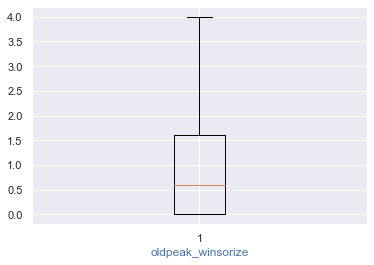

In [109]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [110]:
path_train["oldpeak"] = oldpeak_winsorize

In [111]:
thalach_out = iqr(path_test, "thalach")
thalach_out

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal
10,67,1,0,120,71,0,1.0,1,0,2


In [112]:
path_test.head(11)

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal
0,43,1,0,150,171,0,1.5,2,0,2
1,64,0,2,140,133,0,0.2,2,0,3
2,63,0,1,140,179,0,0.0,2,2,2
3,52,1,0,125,168,0,1.0,2,2,3
4,52,1,2,138,169,0,0.0,2,4,2
5,60,0,2,120,96,0,0.0,2,0,2
6,64,1,3,110,144,1,1.8,1,0,2
7,58,1,0,128,130,1,3.0,1,2,3
8,57,1,0,165,124,0,1.0,1,3,3
9,41,1,1,120,182,0,0.0,2,0,2


In [113]:
path_test = path_test.drop(10, axis = 0)

In [114]:
path_test.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75],
           dtype='int64')

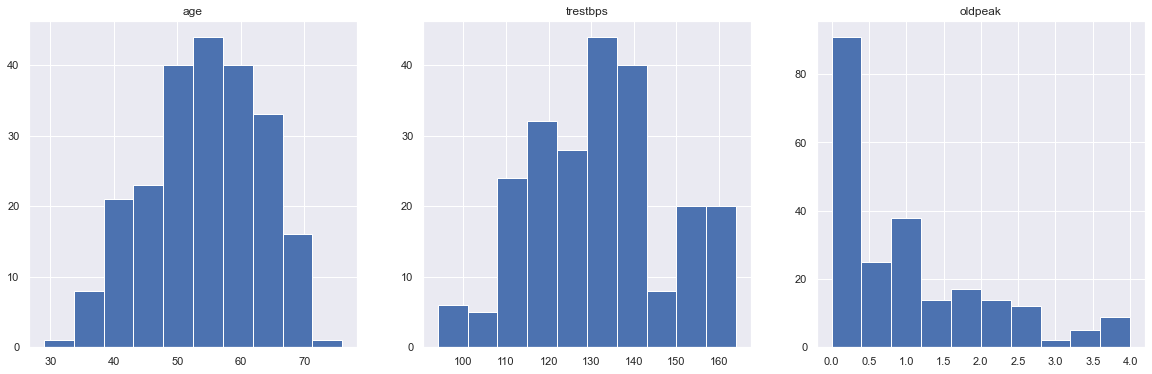

In [115]:
fig, (ax1, ax2, ax4) = plt.subplots(1, 3, figsize = (20, 6))
# fig, (ax4) = plt.subplots(1, 1, figsize = (6, 6))
ax1.hist(path_train["age"])
ax1.set_title("age")

ax2.hist(path_train["trestbps"])
ax2.set_title("trestbps")

# ax3.hist(path_train["chol_winsorize"])
# ax3.set_title("chol_winsorize")

ax4.hist(path_train["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

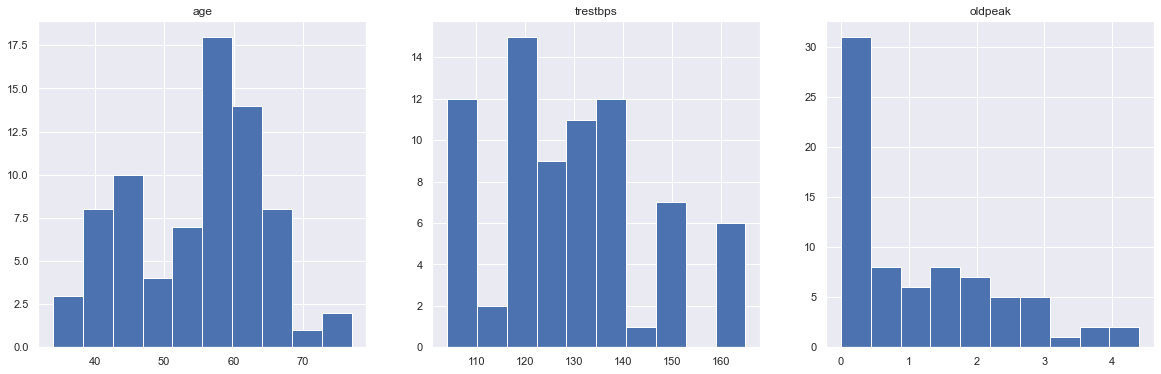

In [116]:
fig, (ax1, ax2, ax4) = plt.subplots(1, 3, figsize = (20, 6))
# fig, (ax4) = plt.subplots(1, 1, figsize = (6, 6))
ax1.hist(path_test["age"])
ax1.set_title("age")

ax2.hist(path_test["trestbps"])
ax2.set_title("trestbps")

# ax3.hist(path_train["chol_winsorize"])
# ax3.set_title("chol_winsorize")

ax4.hist(path_test["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

In [117]:
path_train["oldpeak"] = np.sqrt(path_train["oldpeak"])
path_test["oldpeak"] = np.sqrt(path_test["oldpeak"])

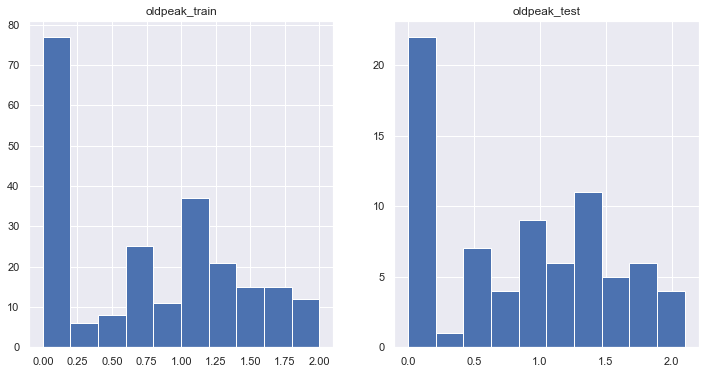

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.hist(path_train["oldpeak"])
ax1.set_title("oldpeak_train")

ax2.hist(path_test["oldpeak"])
ax2.set_title("oldpeak_test")

plt.show()

In [119]:
display(path_train.head(2),
path_test.head(2))

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
0,71,0,0,112,125,0,1.264911,1,0,2,1
1,58,0,0,164,146,1,1.673320,1,2,1,0


,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal
0,43,1,0,150,171,0,1.224745,2,0,2
1,64,0,2,140,133,0,0.447214,2,0,3


In [120]:
path_train.thal = path_train.thal.replace(0, 1)

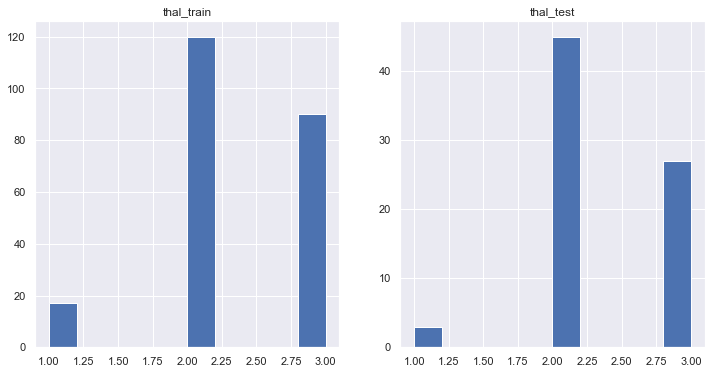

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6))

ax1.hist(path_train["thal"])
ax1.set_title("thal_train")

ax2.hist(path_test["thal"])
ax2.set_title("thal_test")

plt.show()

In [122]:
columns_to_encode = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']

In [123]:
path_train = pd.get_dummies(path_train, columns = columns_to_encode, drop_first = True)
path_test = pd.get_dummies(path_test, columns = columns_to_encode, drop_first = True)

In [124]:
display(path_train.iloc[:5, 5:].head(),
        path_test.iloc[:5, 4:].head())

,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,1,1,0,0,0,0,1


,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,1,0,0,0,1
4,1,0,1,0,0,0,1,0,0,0,1,1,0


In [125]:
path_train.head()

,age,trestbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,71,112,125,1.264911,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,58,164,146,1.673320,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,55,128,130,1.414214,0,0,0,0,0,1,1,0,1,0,0,0,0,1
3,63,145,150,1.516575,1,1,0,0,1,0,0,0,0,0,0,0,0,0
4,59,140,162,0.000000,0,1,0,0,0,1,0,1,1,0,0,0,0,1


In [126]:
num_cols = ['age', 'trestbps', "thalach", "oldpeak"]

In [127]:
rs = RobustScaler()
path_train[num_cols] = rs.fit_transform(path_train[num_cols])
path_test[num_cols] = rs.fit_transform(path_test[num_cols])

In [128]:
path_test.head()

,age,trestbps,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,-0.787879,1.10,0.529412,0.246204,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0.484848,0.60,-0.588235,-0.333333,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0.424242,0.60,0.764706,-0.666667,0,1,0,0,0,0,1,0,1,0,0,1,0
3,-0.242424,-0.15,0.441176,0.078689,1,0,0,0,0,0,1,0,1,0,0,0,1
4,-0.242424,0.50,0.470588,-0.666667,1,0,1,0,0,0,1,0,0,0,1,1,0


In [129]:
X = path_train.drop(['target'], axis = 1)
y = path_train['target']
x_test = path_test
display(X.head(), x_test.head(), y.head())

,age,trestbps,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,1.333333,-0.90,-0.87500,0.387628,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0.250000,1.70,-0.21875,0.710503,0,0,0,0,1,1,0,0,1,0,0,0,0
2,0.000000,-0.10,-0.71875,0.505662,0,0,0,0,1,1,0,1,0,0,0,0,1
3,0.666667,0.75,-0.09375,0.586585,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0.333333,0.50,0.28125,-0.612372,1,0,0,0,1,0,1,1,0,0,0,0,1


,age,trestbps,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,-0.787879,1.10,0.529412,0.246204,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0.484848,0.60,-0.588235,-0.333333,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0.424242,0.60,0.764706,-0.666667,0,1,0,0,0,0,1,0,1,0,0,1,0
3,-0.242424,-0.15,0.441176,0.078689,1,0,0,0,0,0,1,0,1,0,0,0,1
4,-0.242424,0.50,0.470588,-0.666667,1,0,1,0,0,0,1,0,0,0,1,1,0


0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [130]:
best_model = LogisticRegression(penalty='l1', solver='saga')

In [131]:
best_model.fit(X, y)


LogisticRegression(penalty='l1', solver='saga')

In [132]:
# Блок предсказания с использованием test.csv
#  
# название вектора предсказанных значений  y_predict 
# название cписка индексов использованных в предсказании   mask_true 

In [133]:



mask_true = path_test.index.tolist()
y_predict = best_model.predict(x_test)

In [134]:
print(mask_true)
print(y_predict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1
 0]
